In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
# lê o arquivo e cria lista com cada json

with open("../data/car_info.json") as f:
    
    json_list = json.load(f)

In [3]:
# identificando quais chaves têm listas como valores
# nestes casos, o json_normalize falha, por isso é importante identificarmos
# antes pra fazer o flatenning

list_values = []
for item in json_list:
    
    for key in item.keys():

        if type(item[key]) == list:

            # print(key, item[key])
            
            if key not in list_values:
                
                list_values.append(key)
                
    # print("\n", "#"*20, "\n")
    
list_values

['Channels', 'HotDeal']

In [4]:
# fazendo o flattening dos valores que são listas

for item in json_list:
    
    for key in list_values:

        try:
            for i in range(len(item[key])):

                item[key + "_" + str(i+1)] = item[key][i]
                
            item.pop(key)
        
        except:
            
            pass

In [5]:
# montando o df

df = pd.json_normalize(json_list)

In [6]:
# colunas com dados missing

missing = df.isnull().sum()[df.isnull().sum().apply(lambda x: True if x!=0 else False)]

# normalizando
missing = (missing/df.shape[0])

missing.apply(lambda x: str(round(x*100, 2)) + "%" if x != 0 else "-")

LongComment                         8.31%
FipePercent                         4.01%
Specification.VehicleAttributes      1.0%
GoodDeal                           80.89%
Channels_2.id                       87.4%
Channels_2.Value                    87.4%
Prices.OldPrice                    99.59%
HotDeal_1.Id                        98.6%
HotDeal_1.Value                     98.6%
VipAutopago                        99.82%
dtype: object

In [7]:
# vamos dropar as colunas que tenham mais que 50% de NaNs

threshold_drop = 0.5

print("\nThreshold: " + str(threshold_drop*100) + "%\n")
display(missing[missing>threshold_drop])

drop_nans = missing[missing>threshold_drop].index.tolist()

# dropando!
df = df.drop(columns=drop_nans)


Threshold: 50.0%



GoodDeal            0.808853
Channels_2.id       0.874001
Channels_2.Value    0.874001
Prices.OldPrice     0.995903
HotDeal_1.Id        0.986011
HotDeal_1.Value     0.986011
VipAutopago         0.998201
dtype: float64

In [27]:
rename_dic = {'UniqueId' : 'UniqueId',
                'ProductCode' : 'ProductCode',
                'LongComment' : 'comentário',
                'FipePercent' : 'fipe_perc',
                'Specification.Title' : 'titulo_anuncio',
                'Specification.Make.id' : 'Specification.Make.id',
                'Specification.Make.Value' : 'marca',
                'Specification.Model.id' : 'Specification.Model.id',
                'Specification.Model.Value' : 'modelo',
                'Specification.Version.id' : 'Specification.Version.id',
                'Specification.Version.Value' : 'versão',
                'Specification.YearFabrication' : 'ano_fabricação',
                'Specification.YearModel' : 'ano_modelo',
                'Specification.Odometer' : 'km',
                'Specification.Transmission' : 'transmissão',
                'Specification.NumberPorts' : 'num_portas',
                'Specification.VehicleAttributes' : 'atributos',
                'Specification.Armored' : 'blindado',
                'Specification.Color.IdPrimary' : 'Specification.Color.IdPrimary',
                'Specification.Color.Primary' : 'cor',
                'Seller.Id' : 'Seller.Id',
                'Seller.SellerType' : 'vendedor_tipo',
                'Seller.City' : 'vendedor_cidade',
                'Seller.State' : 'vendedor_estado',
                'Seller.AdType.id' : 'Seller.AdType.id',
                'Seller.AdType.Value' : 'tipo_anuncio',
                'Seller.BudgetInvestimento' : 'Seller.BudgetInvestimento',
                'Seller.DealerScore' : 'Seller.DealerScore',
                'Seller.CarDelivery' : 'car_delivery',
                'Seller.TrocaComTroco' : 'troca_troco',
                'Prices.Price' : 'preço',
                'Prices.SearchPrice' : 'preço_busca',
                'Channels_1.id' : 'Channels_1.id',
                'Channels_1.Value' : 'Channels_1.Value'}

df = df.rename(columns=rename_dic)

cols_select = ['titulo_anuncio','marca','modelo','versão','ano_fabricação','ano_modelo','km',
               'preço','preço_busca','fipe_perc',
               'cor','transmissão','num_portas','atributos','comentário','blindado',
               'vendedor_tipo','vendedor_cidade','vendedor_estado','tipo_anuncio',
               'car_delivery','troca_troco']

df = df[cols_select]

In [28]:
# TODO: funcao
# https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

df.head(3)

,titulo_anuncio,marca,modelo,versão,ano_fabricação,ano_modelo,km,preço,preço_busca,fipe_perc,cor,transmissão,num_portas,atributos,comentário,blindado,vendedor_tipo,vendedor_cidade,vendedor_estado,tipo_anuncio,car_delivery,troca_troco
0,LAND ROVER RANGE ROVER SPORT 3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO,LAND ROVER,RANGE ROVER SPORT,3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO,2014,2014.0,50000.0,279900.0,279900.0,123.0,Branco,Automatizada,4,"[{'Name': 'Único dono'}, {'Name': 'IPVA pago'}, {'Name': 'Licenciado'}, {'Name': 'Garantia de fábrica'}]",Veículo impecável. \n\núnico dono.,S,PF,Santana de Parnaíba,São Paulo (SP),Pessoa Física,False,False
1,JAGUAR XF 2.0 LUXURY TURBOCHARGED GASOLINA 4P AUTOMÁTICO,JAGUAR,XF,2.0 LUXURY TURBOCHARGED GASOLINA 4P AUTOMÁTICO,2014,2015.0,44000.0,105000.0,105000.0,87.0,Preto,Automática,4,"[{'Name': 'Aceita troca'}, {'Name': 'Único dono'}, {'Name': 'Todas as revisões feitas pela concessionária'}, {'Name': 'IPVA pago'}, {'Name': 'Licenciado'}]",NaN,N,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False
2,PEUGEOT 208 1.6 GRIFFE 16V FLEX 4P AUTOMÁTICO,PEUGEOT,208,1.6 GRIFFE 16V FLEX 4P AUTOMÁTICO,2014,2014.0,36000.0,26000.0,26000.0,72.0,Branco,Automática,0,"[{'Name': 'Único dono'}, {'Name': 'IPVA pago'}, {'Name': 'Licenciado'}]","O valor do veículo no estado em que se encontra é de R$ 15.000,00.\nVale a pena conhecer!!\nFoi anunciado por R$ 26.000,00 pois o site não aceita valor menor, mas o correto é R$ 15.000,00\n",N,PF,Campinas,São Paulo (SP),Pessoa Física,False,False


____
____

,titulo_anuncio,marca,modelo,versão,ano_fabricação,ano_modelo,km,preço,preço_busca,fipe_perc,cor,transmissão,num_portas,atributos,comentário,blindado,vendedor_tipo,vendedor_cidade,vendedor_estado,tipo_anuncio,car_delivery,troca_troco
7433,AUDI A5 2.0 TFSI SPORTBACK AMBITION PLUS 16V GASOLINA 4P S-TRONIC,AUDI,A5,2.0 TFSI SPORTBACK AMBITION PLUS 16V GASOLINA 4P S-TRONIC,2018,2018.0,30000.0,195000000.0,195000000.0,97365.0,Preto,Automática,4,"[{'Name': 'Aceita troca'}, {'Name': 'Todas as revisões feitas pela agenda do carro'}, {'Name': 'Único dono'}, {'Name': 'Todas as revisões feitas pela concessionária'}, {'Name': 'IPVA pago'}, {'Name': 'Licenciado'}, {'Name': 'Garantia de fábrica'}]","Motor 2.0 com tec. FSI que gera 252 cv e acelera de 0 a 100 km/h em 6,0 segundos.\nCâmbio de dupla embreagem S tronic.\nTração integral Quattro®.\nRádio MMI plus com touchpad.\nSmartphone Interface, com duas entradas USB.\nTeto solar panorâmico.\nKit esportivo S line.\nAudi pre sense, prepara o carro para a eventualidade de uma colisão.\nAssistance Tour traz sensor de estac. dianteiro, controle de cruzeiro adaptativo com traffic jam assist, assistente para luz alta e assistente para troca de pistas.",N,PF,Florianópolis,Santa Catarina (SC),Pessoa Física,False,False


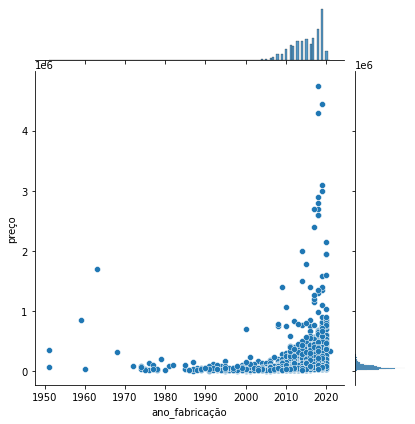

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

df["ano_fabricação"] = df["ano_fabricação"].apply(lambda x: int(x))

# claramente um outlier...
df = df[df["preço"] < 1e8]

sns.jointplot(data=df, x="ano_fabricação", y="preço")

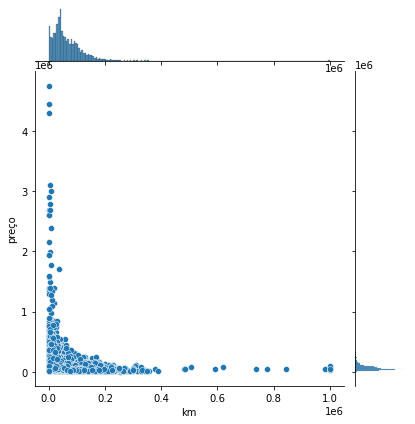

In [73]:
sns.jointplot(data=df, x="km", y="preço")

<Figure size 1080x864 with 0 Axes>

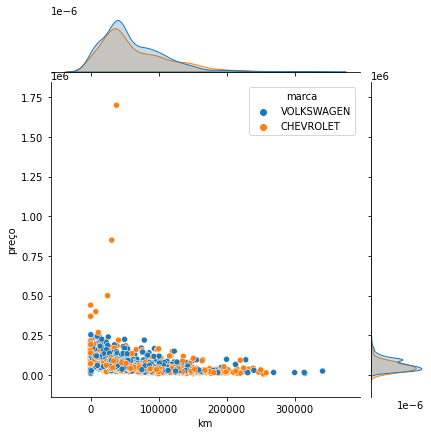

In [71]:
plt.figure(figsize=(15, 12))

sns.jointplot(data=df[df["marca"].isin(["CHEVROLET", "VOLKSWAGEN"])], x="km", y="preço", hue="marca")

plt.show()

In [25]:
df[df["preço"] != df["preço_busca"]]

,UniqueId,ProductCode,comentário,fipe_perc,titulo_anuncio,Specification.Make.id,marca,Specification.Model.id,modelo,Specification.Version.id,versão,ano_fabricação,ano_modelo,km,transmissão,num_portas,Specification.BodyType,atributos,blindado,Specification.Color.IdPrimary,cor,Seller.Id,vendedor_tipo,vendedor_cidade,vendedor_estado,Seller.AdType.id,tipo_anuncio,Seller.BudgetInvestimento,Seller.DealerScore,car_delivery,troca_troco,preço,preço_busca,Channels_1.id,Channels_1.Value


In [34]:
df.groupby(["marca", "modelo"])[["modelo"]].count()

modelo
marca           modelo        
ALFA ROMEO      156          2
                164          1
AUDI            A1          13
                A3         103
                A4          42
...                        ...
VOLVO           XC40         9
                XC60        57
                XC90        19
WILLYS          JEEP         1
WILLYS OVERLAND JEEP         1

[521 rows x 1 columns]

In [37]:
aux = df.groupby(["marca", "modelo", "ano_fabricação"])[["ano_fabricação"]].count()

In [61]:
aux.loc[['HONDA']]

ano_fabricação
marca modelo ano_fabricação                
HONDA ACCORD 2001                         1
             2010                         1
             2011                         1
             2016                         2
             2017                         2
...                                     ...
      HR-V   2020                         5
      WR-V   2017                         4
             2018                         1
             2019                         1
             2020                         1

[74 rows x 1 columns]